In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.path.abspath("."), os.pardir))
DATA_DIR = os.path.join(BASE_DIR, 'data')
SEED=2

In [3]:
df_train = pd.read_csv(os.path.join(DATA_DIR, 'processed_train.csv'))
df_test = pd.read_csv(os.path.join(DATA_DIR, 'processed_test.csv'))

# Modelo base

In [4]:
features = [x for x in df_train.columns if x not in ['PassengerId', 'Survived']]
X = df_train[features]
y = df_train['Survived']

In [5]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
model = GradientBoostingClassifier(random_state=SEED)
scores = cross_val_score(model, X, y, cv=kfold, n_jobs=-1, verbose=1, scoring='roc_auc')

print('AUC:', np.round(scores, 2))
print('AUC mean: %0.4f' % (scores.mean()))
print('AUC std: %0.4f' % (scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


AUC: [0.88 0.85 0.86 0.88 0.89]
AUC mean: 0.8711
AUC std: 0.0130


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Text(0, 0.5, 'Feature Importance Score')

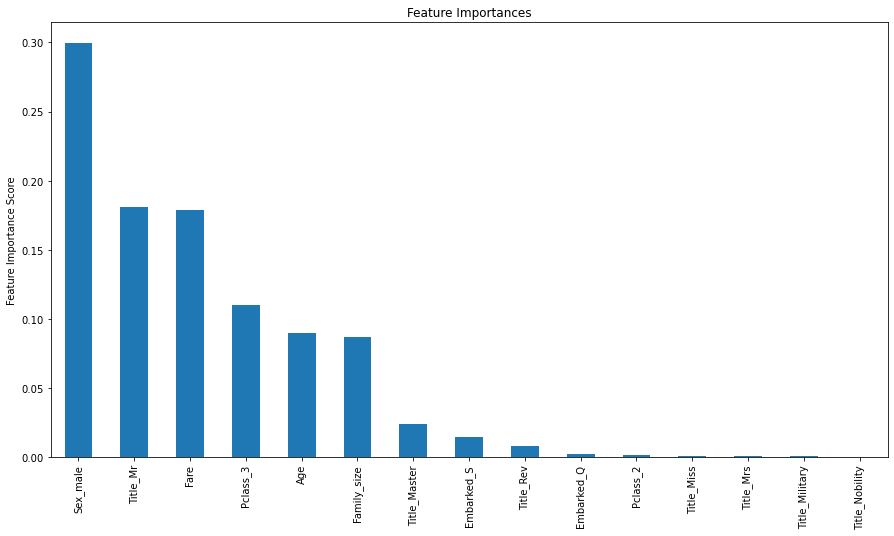

In [6]:
model.fit(X, y)
feat_imp = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# Modelo 001

## Tuning

In [7]:
def grid_search(X_train, y_train,params, random=False, k=5, scoring='roc_auc'):
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)
    clf = GradientBoostingClassifier(random_state=SEED)
    
    if random:
        grid = RandomizedSearchCV(clf, params, cv=kfold, n_iter=20, n_jobs=-1, scoring=scoring)
    else:
        grid = GridSearchCV(clf, params, cv=kfold, n_jobs=-1, scoring=scoring)
    
    grid.fit(X_train, y_train)
    
    best_score = grid.best_score_
    print("Metric:", scoring)
    print("Training score: {:.3f}".format(best_score))
    best_params = grid.best_params_
    print("Best params:", best_params)
    
    x = grid.cv_results_ 
    mean_fit_time = x['mean_fit_time'].mean()
    std_fit_time = x['std_fit_time'].mean()
    mean_score_time = x['mean_score_time'].mean()
    std_score_time = x['std_score_time'].mean()
    mean_test_score = x['mean_test_score'].mean()
    std_test_score = x['std_test_score'].mean()
    
    print("\n")
    print('mean_fit_time:', mean_fit_time)
    print('std_fit_time:', std_fit_time)
    print('mean_score_time:', mean_score_time)
    print('std_score_time:', std_score_time)
    print('mean_test_score:', mean_test_score)
    print('std_test_score:', std_test_score)

In [8]:
params = {}

In [9]:
params['n_estimators'] = [2, 10, 25, 50, 100, 250, 500, 1000]
params['learning_rate'] = [0.1]

In [10]:
params

{'n_estimators': [2, 10, 25, 50, 100, 250, 500, 1000], 'learning_rate': [0.1]}

In [11]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.873
Best params: {'learning_rate': 0.1, 'n_estimators': 50}


mean_fit_time: 0.2481625318527222
std_fit_time: 0.017367827111608093
mean_score_time: 0.004131847620010376
std_score_time: 0.001305735083645467
mean_test_score: 0.8659350218674698
std_test_score: 0.020361131618172563


In [12]:
params['n_estimators'] = range(25, 80, 5)

In [13]:
params

{'n_estimators': range(25, 80, 5), 'learning_rate': [0.1]}

In [14]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.874
Best params: {'learning_rate': 0.1, 'n_estimators': 55}


mean_fit_time: 0.05739880041642622
std_fit_time: 0.006126491561311784
mean_score_time: 0.003737575357610529
std_score_time: 0.0013831056859469261
mean_test_score: 0.8716850032677907
std_test_score: 0.014834927109761918


In [15]:
params['n_estimators'] = range(45, 65, 1)

In [16]:
params

{'n_estimators': range(45, 65), 'learning_rate': [0.1]}

In [17]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.874
Best params: {'learning_rate': 0.1, 'n_estimators': 48}


mean_fit_time: 0.061617531776428223
std_fit_time: 0.008071188297313967
mean_score_time: 0.0031172275543212896
std_score_time: 0.0010717000099048813
mean_test_score: 0.8733767070740251
std_test_score: 0.014292172493233585


In [18]:
params['n_estimators'] = [48]
params['min_samples_split'] = range(2, 51, 2)
params['max_depth'] = range(1, 8, 1)

In [19]:
params

{'n_estimators': [48],
 'learning_rate': [0.1],
 'min_samples_split': range(2, 51, 2),
 'max_depth': range(1, 8)}

In [20]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 48}


mean_fit_time: 0.06401029287065778
std_fit_time: 0.006674286345419225
mean_score_time: 0.0031405912126813615
std_score_time: 0.0013511360612072816
mean_test_score: 0.8705124772612747
std_test_score: 0.0197292214885754


In [21]:
params['max_depth'] = [4]
params['min_samples_leaf'] = range(1, 50, 2)

In [22]:
params

{'n_estimators': [48],
 'learning_rate': [0.1],
 'min_samples_split': range(2, 51, 2),
 'max_depth': [4],
 'min_samples_leaf': range(1, 50, 2)}

In [23]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 48}


mean_fit_time: 0.057595714340209964
std_fit_time: 0.006776508010739849
mean_score_time: 0.0029540802764892577
std_score_time: 0.0012847000383577971
mean_test_score: 0.8697009397914004
std_test_score: 0.01747250437483668


In [24]:
X.shape

(891, 15)

In [25]:
params['min_samples_leaf'] = [1]
params['min_samples_split'] = [2]
params['max_features'] = range(1,16,1)

In [26]:
params

{'n_estimators': [48],
 'learning_rate': [0.1],
 'min_samples_split': [2],
 'max_depth': [4],
 'min_samples_leaf': [1],
 'max_features': range(1, 16)}

In [27]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 48}


mean_fit_time: 0.04928552309672038
std_fit_time: 0.007425716835745882
mean_score_time: 0.0025720246632893883
std_score_time: 0.0007783490284294296
mean_test_score: 0.8741081200801747
std_test_score: 0.017266515005278798


In [28]:
params['max_features'] = [15]
params['subsample'] = [0.6,0.7,0.75,0.8,0.85,0.9]

In [29]:
params

{'n_estimators': [48],
 'learning_rate': [0.1],
 'min_samples_split': [2],
 'max_depth': [4],
 'min_samples_leaf': [1],
 'max_features': [15],
 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}

In [30]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.879
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 48, 'subsample': 0.8}


mean_fit_time: 0.05932213465372721
std_fit_time: 0.008779884514459083
mean_score_time: 0.0024832884470621743
std_score_time: 0.000876673838652851
mean_test_score: 0.8746170431644633
std_test_score: 0.01995084962179151


In [31]:
params['subsample'] = [0.8]
params['n_estimators'] = range(48, 200, 2)
params['learning_rate'] = [0.001, 0.01, 0.1, 0.15, 0.2]

In [32]:
params

{'n_estimators': range(48, 200, 2),
 'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
 'min_samples_split': [2],
 'max_depth': [4],
 'min_samples_leaf': [1],
 'max_features': [15],
 'subsample': [0.8]}

In [33]:
grid_search(X, y, params)

Metric: roc_auc
Training score: 0.882
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64, 'subsample': 0.8}


mean_fit_time: 0.17315573642128393
std_fit_time: 0.008998001330787897
mean_score_time: 0.003472562714626915
std_score_time: 0.0012681512894058837
mean_test_score: 0.8742848170165286
std_test_score: 0.022473642167008454


## Modelo final

In [34]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
final_model = GradientBoostingClassifier(
    random_state=SEED, learning_rate=0.1, max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=2, 
    n_estimators=64, subsample=0.8)
scores = cross_val_score(final_model, X, y, cv=kfold, n_jobs=-1, verbose=1, scoring='roc_auc')

print('AUC:', np.round(scores, 2))
print('AUC mean: %0.4f' % (scores.mean()))
print('AUC std: %0.4f' % (scores.std()))

AUC: [0.9  0.85 0.88 0.89 0.9 ]
AUC mean: 0.8825
AUC std: 0.0173


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Text(0, 0.5, 'Feature Importance Score')

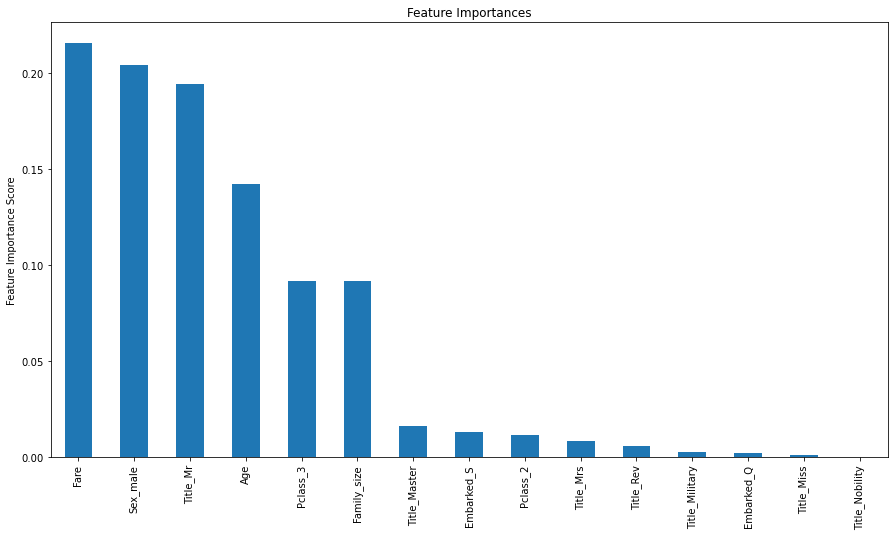

In [35]:
final_model.fit(X, y)
feat_imp = pd.Series(final_model.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [36]:
df_test['Survived'] = final_model.predict(df_test[features])

In [37]:
df_test['Survived'].value_counts()

0    270
1    148
Name: Survived, dtype: int64

In [38]:
df_test[['PassengerId', 'Survived']].to_csv('gbm_001.csv', index=False)

In [39]:
# Kaggle score: 0.77511

# Modelo 002

In [40]:
best_feat = ['Fare', 'Sex_male', 'Title_Mr', 'Age', 'Pclass_3', 'Family_size']

In [41]:
params={'learning_rate': [0.1], 'max_depth': [4], 'max_features': [6], 'min_samples_leaf': [1], 
        'min_samples_split': [2], 'n_estimators': [64], 'subsample': [0.8]}

In [42]:
params

{'learning_rate': [0.1],
 'max_depth': [4],
 'max_features': [6],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [64],
 'subsample': [0.8]}

In [43]:
X_002 = X[best_feat]

In [44]:
X_002.head()

,Fare,Sex_male,Title_Mr,Age,Pclass_3,Family_size
0,7.2500,1,1,22.0,1,2
1,71.2833,0,0,38.0,0,2
2,7.9250,0,0,26.0,1,1
3,53.1000,0,0,35.0,0,2
4,8.0500,1,1,35.0,1,1


## Base

In [45]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
model_002 = GradientBoostingClassifier(
    random_state=SEED, learning_rate=0.1, max_depth=4, max_features=6, min_samples_leaf=1, min_samples_split=2, 
    n_estimators=64, subsample=0.8)
scores = cross_val_score(model_002, X_002, y, cv=kfold, n_jobs=-1, verbose=1, scoring='roc_auc')

print('AUC:', np.round(scores, 2))
print('AUC mean: %0.4f' % (scores.mean()))
print('AUC std: %0.4f' % (scores.std()))

AUC: [0.88 0.83 0.87 0.88 0.89]
AUC mean: 0.8716
AUC std: 0.0209


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Text(0, 0.5, 'Feature Importance Score')

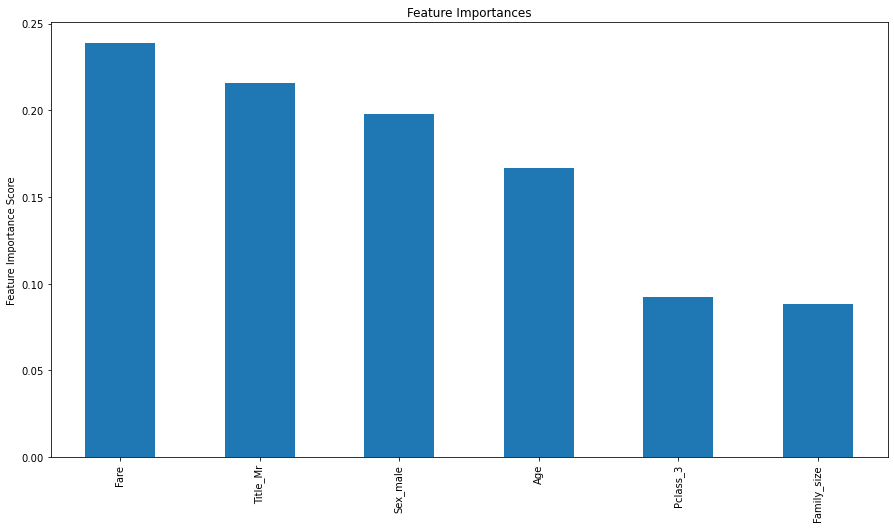

In [46]:
model_002.fit(X_002, y)
feat_imp = pd.Series(model_002.feature_importances_, best_feat).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Tuning

In [47]:
params['n_estimators'] = range(48, 145, 2)

In [48]:
params

{'learning_rate': [0.1],
 'max_depth': [4],
 'max_features': [6],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': range(48, 145, 2),
 'subsample': [0.8]}

In [49]:
grid_search(X_002, y, params)

Metric: roc_auc
Training score: 0.874
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 88, 'subsample': 0.8}


mean_fit_time: 0.12374725244483169
std_fit_time: 0.008007742607658108
mean_score_time: 0.003122171090573681
std_score_time: 0.0010203307865286498
mean_test_score: 0.872137289807318
std_test_score: 0.021622890819984725


In [50]:
params['n_estimators'] = [88]
params['min_samples_split'] = range(2, 51, 2)
params['max_depth'] = range(1, 8, 1)

In [51]:
params

{'learning_rate': [0.1],
 'max_depth': range(1, 8),
 'max_features': [6],
 'min_samples_leaf': [1],
 'min_samples_split': range(2, 51, 2),
 'n_estimators': [88],
 'subsample': [0.8]}

In [52]:
grid_search(X_002, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 88, 'subsample': 0.8}


mean_fit_time: 0.11095423153468541
std_fit_time: 0.0062602345512065925
mean_score_time: 0.0032293750217982703
std_score_time: 0.0010750233540739531
mean_test_score: 0.8694812578561543
std_test_score: 0.021087952488627028


In [53]:
params['max_depth'] = [4]
params['min_samples_split'] = [4]
params['min_samples_leaf'] = range(1,10,1)

In [54]:
params

{'learning_rate': [0.1],
 'max_depth': [4],
 'max_features': [6],
 'min_samples_leaf': range(1, 10),
 'min_samples_split': [4],
 'n_estimators': [88],
 'subsample': [0.8]}

In [55]:
grid_search(X_002, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 88, 'subsample': 0.8}


mean_fit_time: 0.10870483186509874
std_fit_time: 0.0097159312965995
mean_score_time: 0.00301820437113444
std_score_time: 0.0007932941971621134
mean_test_score: 0.8724104353719667
std_test_score: 0.020267709709362234


In [56]:
params['min_samples_leaf'] = [2]
params['max_features'] = range(1,7,1)

In [57]:
params

{'learning_rate': [0.1],
 'max_depth': [4],
 'max_features': range(1, 7),
 'min_samples_leaf': [2],
 'min_samples_split': [4],
 'n_estimators': [88],
 'subsample': [0.8]}

In [58]:
grid_search(X_002, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 88, 'subsample': 0.8}


mean_fit_time: 0.09602309068044025
std_fit_time: 0.008600492064011866
mean_score_time: 0.0031512578328450522
std_score_time: 0.0011730108552138571
mean_test_score: 0.871438406804382
std_test_score: 0.02403968078823128


In [59]:
params['max_features'] = [6]
params['subsample'] = [0.6,0.7,0.75,0.8,0.85,0.9,1]

In [60]:
params

{'learning_rate': [0.1],
 'max_depth': [4],
 'max_features': [6],
 'min_samples_leaf': [2],
 'min_samples_split': [4],
 'n_estimators': [88],
 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1]}

In [61]:
grid_search(X_002, y, params)

Metric: roc_auc
Training score: 0.878
Best params: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 88, 'subsample': 0.8}


mean_fit_time: 0.10951091221400669
std_fit_time: 0.006931035560990509
mean_score_time: 0.0028544970921107705
std_score_time: 0.0007730246634623618
mean_test_score: 0.8720055763901818
std_test_score: 0.02011772573427356


In [62]:
params['subsample'] = [0.8]
params['n_estimators'] = range(48, 144, 2)
params['learning_rate'] = [0.001, 0.01, 0.1, 0.15, 0.2]

In [63]:
params

{'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
 'max_depth': [4],
 'max_features': [6],
 'min_samples_leaf': [2],
 'min_samples_split': [4],
 'n_estimators': range(48, 144, 2),
 'subsample': [0.8]}

In [ ]:
grid_search(X_002, y, params)

## Modelo final

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
final_model = GradientBoostingClassifier(
    random_state=SEED, learning_rate=0.1, max_depth=4, max_features=6, min_samples_leaf=2, min_samples_split=4, 
    n_estimators=90, subsample=0.8)
scores = cross_val_score(final_model, X, y, cv=kfold, n_jobs=-1, verbose=1, scoring='roc_auc')

print('AUC:', np.round(scores, 2))
print('AUC mean: %0.4f' % (scores.mean()))
print('AUC std: %0.4f' % (scores.std()))

In [ ]:
final_model.fit(X_002, y)
feat_imp = pd.Series(final_model.feature_importances_, best_feat).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
df_test['Survived'] = final_model.predict(df_test[best_feat])

In [ ]:
df_test['Survived'].value_counts()

In [ ]:
df_test[['PassengerId', 'Survived']].to_csv('gbm_002.csv', index=False)

In [ ]:
# kaggle score: 0.76076

# Modelo 003

## Base

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
model = GradientBoostingClassifier(
    random_state=SEED, learning_rate=0.1, max_depth=4, max_features=15, min_samples_leaf=1, min_samples_split=2, 
    n_estimators=64, subsample=0.8)
scores = cross_val_score(model, X, y, cv=kfold, n_jobs=-1, verbose=1, scoring='roc_auc')

print('AUC:', np.round(scores, 2))
print('AUC mean: %0.4f' % (scores.mean()))
print('AUC std: %0.4f' % (scores.std()))

In [ ]:
len(y)

In [ ]:
model.fit(X, y)
pred = model.predict(X)
prob = model.predict_proba(X)[:,1]

auc = roc_auc_score(y, prob)
fpr, tpr, thresholds = roc_curve(y, prob)

In [ ]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='GBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
# Sensitivity = tpr
# Specificity = 1 – fpr

In [ ]:
df_train['Survived'].value_counts(normalize=True)

## Thresolds

### G-mean

In [ ]:
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

In [ ]:
plt.plot([0,1], [0,1], linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.plot(fpr, tpr, marker='.', label='GBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### Youden’s J statistic.

In [ ]:
# J = Sensitivity + Specificity – 1
# J = Sensitivity + (1 – FalsePositiveRate) – 1
# J = TruePositiveRate – FalsePositiveRate

In [ ]:
J = tpr - fpr
ix = np.argmax(J)
print('Best Threshold=%f' % (thresholds[ix]))

### Precision-Recall curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y, prob)

In [ ]:
# plot the roc curve for the model
no_skill = len(y[y]) / len(y)
plt.plot([0,1], [no_skill,no_skill], linestyle='--')
plt.plot(recall, precision, marker='.', label='GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)

In [ ]:
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

In [ ]:
no_skill = len(y[y]) / len(y)
plt.plot([0,1], [no_skill,no_skill], linestyle='--')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best thresold')
plt.plot(recall, precision, marker='.', label='GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

### Comparing

In [ ]:
# Deafault:
pred = model.predict(X)
prob = model.predict_proba(X)[:,1]
print("Sensitivity:", recall_score(y, pred))
print("Specificity:", recall_score(y, pred, pos_label=0))
print("Accuracy:", accuracy_score(y, pred))

In [ ]:
# Optimum threshold:
thresh = 0.468451
opt_pred = np.where(prob > thresh, 1, 0)
print("Sensitivity:", recall_score(y, opt_pred))
print("Specificity:", recall_score(y, opt_pred, pos_label=0))
print("Accuracy:", accuracy_score(y, opt_pred))

## Final

In [ ]:
final_proba = model.predict_proba(df_test[features])[:,1]
df_test['Survived'] = np.where(final_proba > thresh, 1, 0)

In [ ]:
df_test['Survived'].value_counts()

In [ ]:
df_test[['PassengerId', 'Survived']].to_csv('gbm_003.csv', index=False)

In [ ]:
# Kaggle score: 0.76794